In [1]:
import numpy as np
from matplotlib import pyplot as plt
from math import pi
from numpy import cos, sin, exp
%matplotlib inline

In [2]:
def cheb(f):
    # INPUT:                  f:  an N+1 length vector of data evaluated on a chebyshev grid between [-1,1]
    # RETURN:            coeffs:  a vector containing the Cheb Coeffs
    
    N = len(f)-1;
    F = np.hstack([f,f[-2:0:-1]])
    FHat = np.fft.fft(F);
    coeffs = FHat[0:N+1];
    gamma = 2*np.ones(N+1)
    gamma[0], gamma[-1] = 1,1
    return np.real(gamma*coeffs/(2*N))


def chebEval(coeffs,x):
    theta = np.arccos(x)
    N = len(coeffs)-1
    NN = np.arange(N+1)
    M = np.cos(NN*theta.reshape((len(x),1)))
    feval = np.dot(M,coeffs)
    
    return feval

def chebDiff(f,x):
    coeffs = cheb(f)
    theta = np.arccos(x)
    N = len(coeffs)-1
    NN = np.arange(N+1)
    M = NN*np.sin(NN*theta.reshape((len(x),1)))
    fprime = np.dot(M,coeffs)
    fprime[1:-1] = fprime[1:-1]/np.sqrt(1-x[1:-1]**2)
    fprime[0] = np.sum(coeffs*(-1)**(np.arange(0,N+1)+1))
    fprime[-1] = np.sum(coeffs*(-1)**(np.arange(0,N+1)))
    return fprime

def centered_diff(f,dx):
    df = f[2:]-f[0:-2]
    df = np.hstack([2*(f[1]-f[0]),df,2*f[-2]-2*f[-1]])/(2*dx)
    return df

In [3]:
# fine grid resolution
tt = np.linspace(0,pi,1000)
xx = np.cos(tt)
ff = exp(xx)*sin(5*xx)
ffp = exp(xx)*(5*cos(5*xx) + sin(5*xx))


In [4]:
N = 16
theta = np.linspace(0,pi,N+1)
x = cos(theta)
f = exp(x)*sin(5*x)
fp = exp(x)*(5*cos(5*x) + sin(5*x))

f_approx = chebEval(cheb(f),x)
fp_approx = chebDiff(f,x)

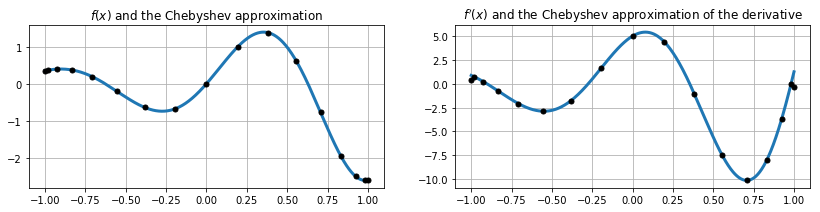

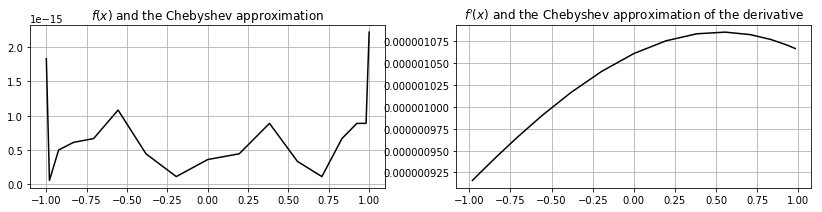

In [5]:
plt.figure(figsize=(14, 3))
plt.subplot(1,2,1)
plt.plot(xx,ff,linewidth=3)
plt.plot(x,f_approx,'ok',markersize=5)
plt.title(r'$f(x)$ and the Chebyshev approximation')
plt.grid()

plt.subplot(1,2,2)
plt.plot(xx,ffp,linewidth=3)
plt.plot(x,fp_approx,'ok',markersize=5)
plt.title(r'$f^\prime (x)$ and the Chebyshev approximation of the derivative')
plt.grid()


plt.figure(figsize = (14,3))
plt.subplot(1,2,1)
plt.plot(x,abs(f-f_approx),'k')
plt.title(r'$f(x)$ and the Chebyshev approximation')
plt.grid()

plt.subplot(1,2,2)
plt.plot(x[1:-1],abs(fp[1:-1]-fp_approx[1:-1]),'k')
plt.title(r'$f^\prime (x)$ and the Chebyshev approximation of the derivative')
plt.grid()

In [6]:
NOut = np.arange(10,50)
error = np.zeros((len(NOut),3))

for j in range(0,len(NOut)):
    N = NOut[j]
    theta = np.linspace(0,pi,N+1)
    x = cos(theta)
    xu = np.linspace(-1,1,N+1)
    
    f = exp(x)*sin(5*x)
    fu = exp(xu)*sin(5*xu)
    fp = exp(x)*(5*cos(5*x) + sin(5*x))
    fpu = exp(xu)*(5*cos(5*xu) + sin(5*xu))
    
    f_approx = chebEval(cheb(f),xx)
    fp_approx = chebDiff(f,xx)
    fp_cd = centered_diff(fu,xu[1]-xu[0])
    
    
    error[j,0] = np.linalg.norm(f_approx - ff,np.inf)
    error[j,1] = np.linalg.norm(fp_approx[1:-1] - ffp[1:-1], np.inf)
    error[j,2] = np.linalg.norm(fp_cd - fpu,np.inf)

Text(0.5,1,'Error in reconstructing $f(x)$ via Chebyshev Polynomials')

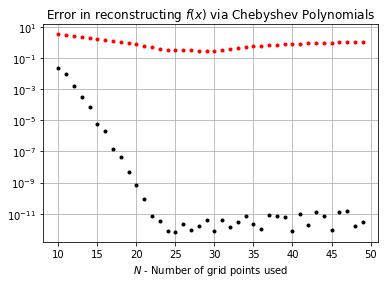

In [7]:
plt.semilogy(NOut,error[:,1],'.k',markersize=6)
plt.semilogy(NOut,error[:,2],'.r',markersize=6)

plt.grid()
plt.xlabel(r'$N$ - Number of grid points used')
plt.title(r'Error in reconstructing $f(x)$ via Chebyshev Polynomials')

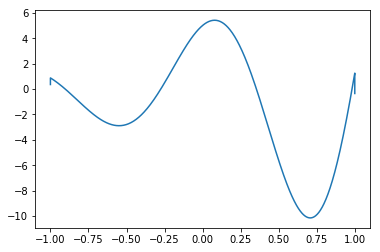

In [8]:
plt.plot(xx,fp_approx)

In [9]:
N = 100
dx = 2/N
x = np.linspace(-1,1,N)
x = x[0:-1]
f = -np.pi*np.sin(np.pi*x)
D2 = np.diag(np.ones(N-2),-1)-2*np.diag(np.ones(N-1),0)+np.diag(np.ones(N-2),1)
D2[0,N-2],D2[N-2,0]=1,1
D2 = D2/(dx**2)

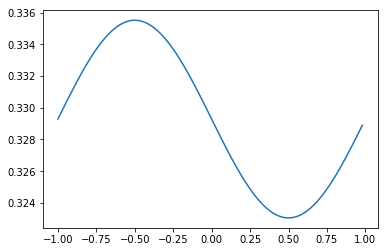

In [10]:
u = np.linalg.solve(D2,f )
plt.plot(x,np.abs(u - 1/pi*sin(pi*x) ))


In [11]:
N = 16
x = np.linspace(-1,1,2*N+1)
x = x[1:]

f = -pi*sin(pi*x)
fHat = np.fft.fft(f)

ik = 1j*pi*np.hstack([1,np.arange(1,N+1),np.arange(-(N-1),0)])
ik2 = ik**2

uHat = np.zeros(np.shape(fHat),dtype = 'complex128')
uHat[1:] = fHat[1:]/ik2[1:]

u = np.fft.ifft(uHat)

C:\ProgramData\Anaconda3\lib\site-packages\numpy\core\numeric.py:492: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


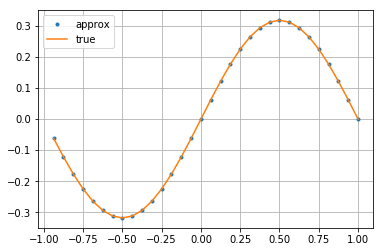

In [12]:
plt.plot(x,u,'.')
plt.plot(x,(1/pi*sin(pi*x)))
plt.legend(['approx','true'])
plt.grid()